In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [2]:
#linking colab page with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Project_dataset = pd.read_csv('/content/drive/MyDrive/Data_For_project_1.csv')
Project_dataset

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [4]:
Project_dataset.shape

(627, 10)

In [5]:
Project_dataset.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [6]:
Project_dataset.groupby(['survived'])['class'].value_counts()

survived  class 
0         Third     257
          Second     69
          First      58
1         First     101
          Third      84
          Second     58
Name: class, dtype: int64

In [7]:
Project_dataset.groupby(['survived'])['sex'].value_counts()

survived  sex   
0         male      336
          female     48
1         female    169
          male       74
Name: sex, dtype: int64

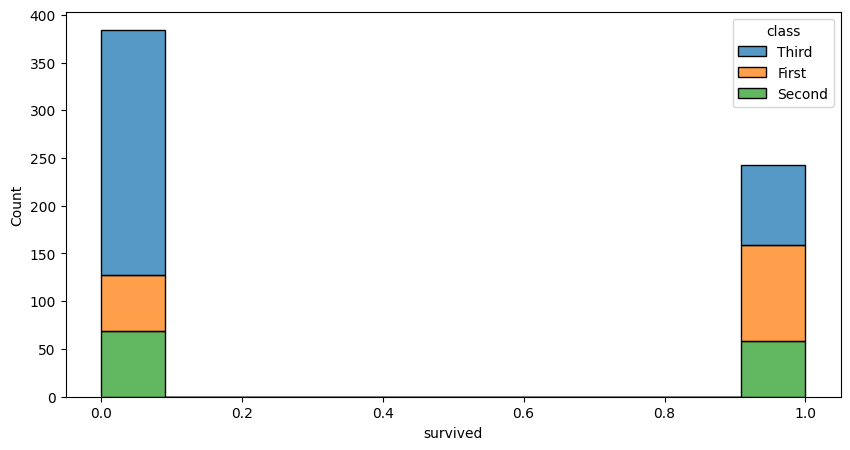

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10,5))
sns.histplot(data=Project_dataset, x="survived", hue="class", multiple="stack");

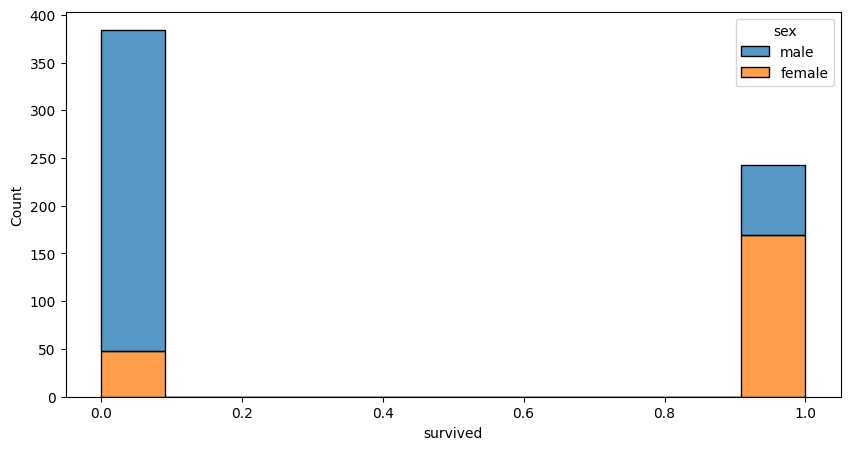

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(data=Project_dataset, x="survived", hue="sex", multiple="stack");

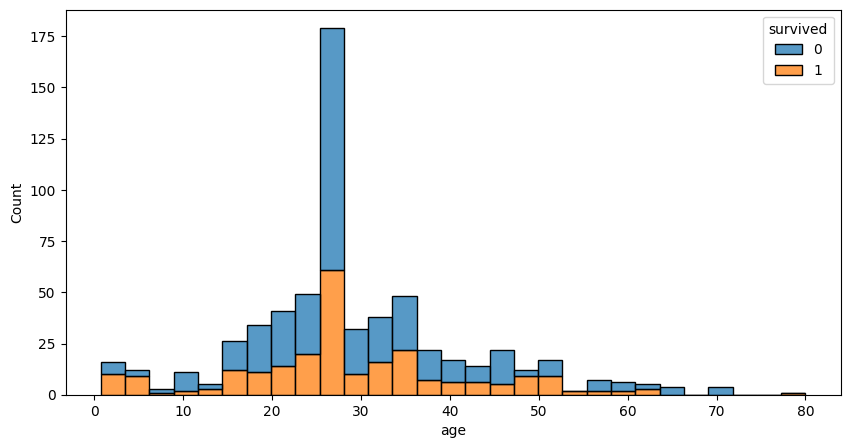

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data=Project_dataset, x="age", hue="survived", multiple="stack");

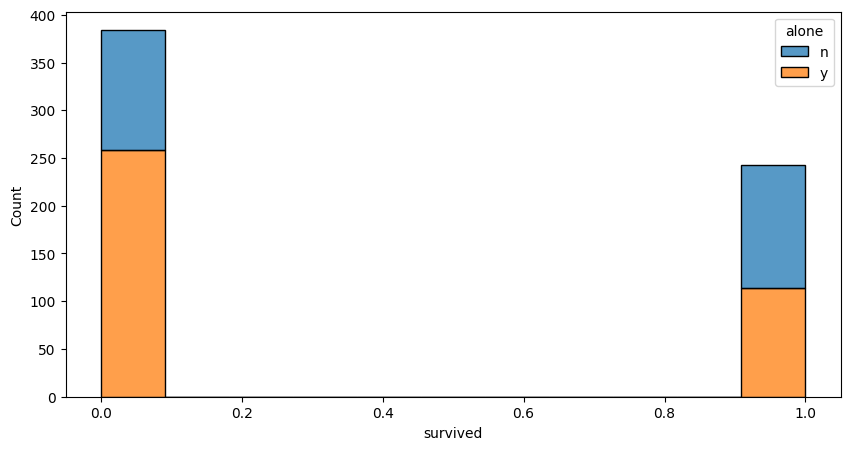

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data=Project_dataset, x="survived", hue="alone", multiple="stack");

In [12]:
Project_dataset.describe(include="O")

,sex,class,deck,embark_town,alone
count,627,627,627,627,627
unique,2,3,8,4,2
top,male,Third,unknown,Southampton,y
freq,410,341,481,450,372


In [13]:
Project_dataset.isna().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [14]:
Project_dataset.duplicated().sum()

69

In [15]:
Project_dataset.drop_duplicates(inplace=True)


In [16]:
Project_dataset.duplicated().sum()

0

In [17]:
Project_dataset['deck'].value_counts()

unknown    412
C           43
B           37
E           23
D           22
A           11
F            6
G            4
Name: deck, dtype: int64

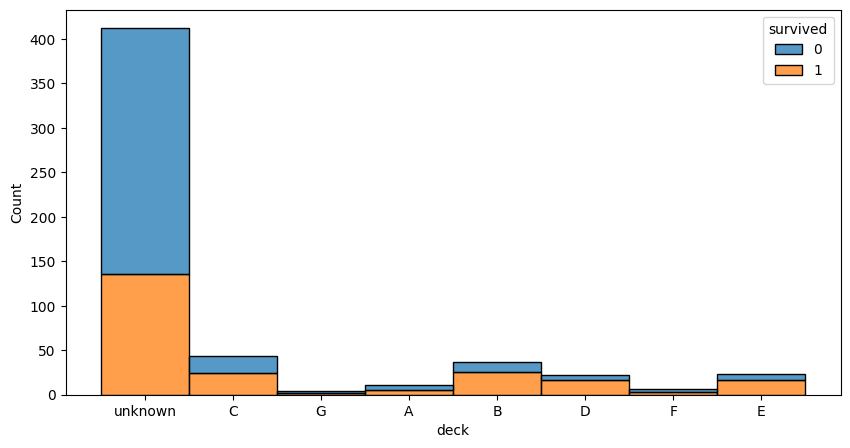

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10,5))
sns.histplot(data=Project_dataset, x="deck", hue="survived", multiple="stack");


In [19]:
#Project_dataset.drop('deck',axis=1,inplace=True)

In [20]:
Project_dataset[Project_dataset['deck']=="unknown"]

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,0,male,2.0,3,1,21.0750,Third,unknown,Southampton,n
6,1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
...,...,...,...,...,...,...,...,...,...,...
618,0,male,20.0,0,0,9.8458,Third,unknown,Southampton,y
621,0,female,22.0,0,0,10.5167,Third,unknown,Southampton,y
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [21]:
# 5. Handle Typos
# Correct known typos in the Sex and Cholesterol columns
#data['Sex'] = data['Sex'].replace({'Famale': 'F', 'Mael': 'M'})
Project_dataset['deck'] = Project_dataset['deck'].replace({'unknown': 'C'})

In [22]:
Project_dataset['deck'].value_counts()

C    455
B     37
E     23
D     22
A     11
F      6
G      4
Name: deck, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

# Create a copy of the data to apply label encoding

# Apply LabelEncoder to the categorical columns
Project_dataset['sex'] = le.fit_transform(Project_dataset['sex'])
Project_dataset['class'] = le.fit_transform(Project_dataset['class'])
Project_dataset['embark_town'] = le.fit_transform(Project_dataset['embark_town'])
Project_dataset['alone'] = le.fit_transform(Project_dataset['alone'])
Project_dataset['deck'] = le.fit_transform(Project_dataset['deck'])


Project_dataset.head()


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,1,22.0,1,0,7.2500,2,2,2,0
1,1,0,38.0,1,0,71.2833,0,2,0,0
2,1,0,26.0,0,0,7.9250,2,2,2,1
3,1,0,35.0,1,0,53.1000,0,2,2,0
4,0,1,28.0,0,0,8.4583,2,2,1,1


In [24]:
#Project_dataset.to_csv("/content/drive/MyDrive/Data_For_project.csv",index=False)

In [25]:
#Project_dataset = pd.read_csv('/content/drive/MyDrive/Data_For_project.csv')

                    survived       sex       age  n_siblings_spouses  \
survived            1.000000 -0.562488 -0.038742           -0.046652   
sex                -0.562488  1.000000  0.061470           -0.056203   
age                -0.038742  0.061470  1.000000           -0.253555   
n_siblings_spouses -0.046652 -0.056203 -0.253555            1.000000   
parch               0.079526 -0.217856 -0.175376            0.395688   
fare                0.247788 -0.162669  0.113730            0.115996   
class              -0.336921  0.145966 -0.362269            0.091738   
deck                0.069769 -0.111789 -0.062350           -0.016138   
embark_town        -0.177041  0.118291 -0.043177            0.047969   
alone              -0.178160  0.285334  0.128659           -0.597150   

                       parch      fare     class      deck  embark_town  \
survived            0.079526  0.247788 -0.336921  0.069769    -0.177041   
sex                -0.217856 -0.162669  0.145966 -0.11178

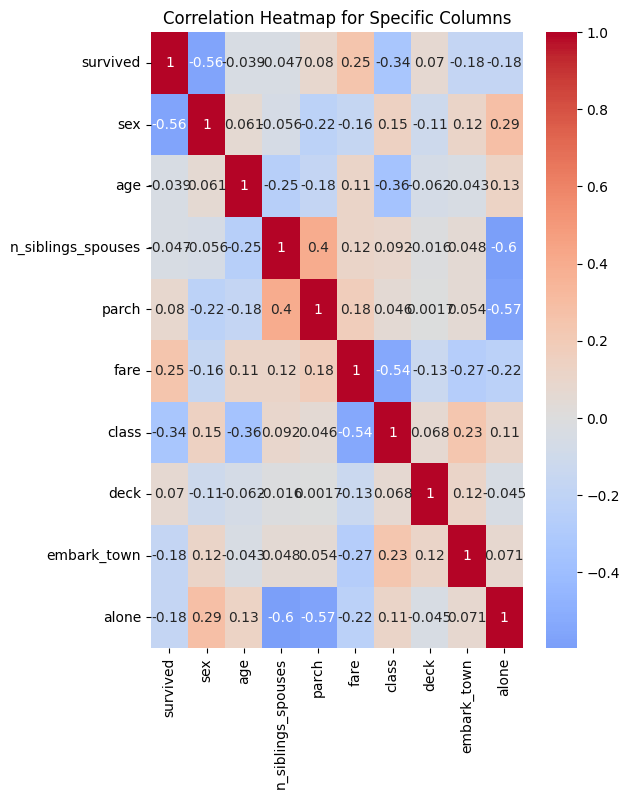

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix for the specific columns
corr_matrix = Project_dataset.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(6, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for Specific Columns')
plt.show()

In [27]:
Project_dataset.drop('age',axis=1,inplace=True)

In [28]:
Project_dataset.drop('deck',axis=1,inplace=True)

In [29]:
Project_dataset.drop('n_siblings_spouses',axis=1,inplace=True)

In [30]:
Project_dataset.drop('parch',axis=1,inplace=True)

In [31]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = Project_dataset.drop('survived', axis=1)
y = Project_dataset['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

train = LogisticRegression(max_iter=30, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.8035714285714286


In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56 16]
 [ 6 34]]


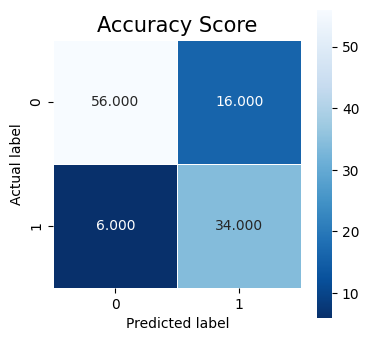

In [35]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [36]:
# Logistic Regression Classifier
train = LogisticRegression(max_iter=300, random_state=24)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1])

In [37]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.7857142857142857


In [38]:
Project_dataset

,survived,sex,fare,class,embark_town,alone
0,0,1,7.2500,2,2,0
1,1,0,71.2833,0,0,0
2,1,0,7.9250,2,2,1
3,1,0,53.1000,0,2,0
4,0,1,8.4583,2,1,1
...,...,...,...,...,...,...
621,0,0,10.5167,2,2,1
622,0,1,10.5000,1,2,1
624,1,0,30.0000,0,2,1
625,0,0,23.4500,2,2,0


In [39]:
#شجرة
X = Project_dataset.drop('survived', axis=1)
y = Project_dataset['survived']

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [42]:
# Fitting Decision Tree Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [42]:
5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)